In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import SGDClassifier
from sklearn.cluster import MiniBatchKMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

sensor_number = 1


In [4]:
def add_noise(df, col_index, n_outliers, sigma, outlier_start_pos):

    for i in range (0, n_outliers):

        df_noisy = df
        
        sigma_T = sigma * df_noisy.iloc[outlier_start_pos + i, col_index]
        #noise_T = random.gauss(0, sigma_T)
        
        df_noisy.iloc[outlier_start_pos + i, col_index] += sigma_T
        
        ## Changing the target label to 1
        
        df_noisy.iloc[outlier_start_pos + i, 2] = 1
        
    return df_noisy

In [5]:
## Reading the dataset from the CSV file
dataset = pd.read_csv('Weather_dataset.csv', index_col = False)

In [6]:
df = dataset[dataset['sensor'] == sensor_number]

In [7]:
# Sorting the measurements based on the date and timestap
df.sort_values(by=['recording_date_time'], inplace=True)


In [8]:
df = df.drop(['recording_date_time', 'sensor'], axis = 1)

In [9]:
df.to_csv('new.csv', index = False)

In [10]:
## How many outliers to create in the dataset
n_outliers = 10

In [11]:
## First, create outliers for the temperature column
for i in range(5):
    temp_outlier_start_pos = random.randint(0, df.shape[0])
    df_temp_outliered = add_noise(df, 0, n_outliers, 2, temp_outlier_start_pos)
    

In [12]:
## Then, create outliers for the humidity column

for i in range(5):
    hum_outlier_start_pos = random.randint(0, df.shape[0])
    df_hum_outliered = add_noise(df, 1, n_outliers, 1, hum_outlier_start_pos)



In [13]:
## Merging the two outliered datasets into a single one
df_outliered = df_temp_outliered
df_outliered['humidity'] = df_hum_outliered['humidity']
df_outliered['target'] |= df_hum_outliered['target']

#df_outliered = df_outliered.drop(['date', 'time', 'month', 'hour'], axis = 1)
df_outliered.to_csv('new1.csv', index = False)

In [14]:
## Scaling the "temperature" and "humidity" columns
scaler = StandardScaler()
scaler.fit(df_outliered.iloc[:,0:2])
df_scaled = scaler.transform(df_outliered.iloc[:,0:2])

In [15]:
# The final dataset 
df_outliered_scaled = df_outliered
df_outliered_scaled.iloc[:, 0:2] = df_scaled

In [16]:
df_outliered_scaled.to_csv('new2.csv', index = False)

In [17]:
## Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    df_outliered.drop('target', axis=1), df_outliered['target'], 
    test_size=0.2, random_state=0, shuffle = False)

In [18]:
print(X_train.values[0])
print(y_train.values[0].ravel())
print(X_train.shape)

[-1.34487797  1.27378057]
[0]
(7008, 2)


In [19]:
X = X_train.values[0]
print(X_train.values[0].reshape(1,-1))

X = np.array([[1,2]])
print("\nX: ", X)

[[-1.34487797  1.27378057]]

X:  [[1 2]]


In [20]:

X = df_outliered_scaled.drop('target', axis=1)

Y = df_outliered_scaled['target']

In [21]:
#cluster_centres = np.array([[10, 0.7], [25, 0.7], [500, 20]])
KM = MiniBatchKMeans(n_clusters = 5,random_state = 0, batch_size = 7)

l = int(X.shape[0]/7)
for i in range(0, l):
    KM.partial_fit(X.values[7*i:7*i+7])

y_pred = KM.fit_predict(X)

In [22]:
for i in range(0, X.shape[0]):
    if KM.predict(X.values[i].reshape(1,-1))[0] == 1 or y_test.values[i] == 1:  
        print("\nPrediction: ", KM.predict(X_test.values[i].reshape(1,-1)))
        print("Real: ", y_test.values[i])


Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0



Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [2]
Real:  0

Prediction:  [2]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

P

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [3]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

P

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

Prediction:  [1]
Real:  0

P

IndexError: index 1752 is out of bounds for axis 0 with size 1752

In [23]:
from sklearn.cluster import Birch

BRC = Birch(n_clusters= 3, threshold = 0.6, branching_factor = 5000)

label_pred = []
for i in range(0, X.shape[0]):
    BRC.partial_fit(X.values[i].reshape(1,-1))
    
    ## Assigning the current measurement to a cluster and store the result in 
    ## label_pred
    label_pred.append(BRC.predict(X.values[i].reshape(1,-1)))

labels = np.array(label_pred)   

In [24]:
columns = ['Prediction']
pred = pd.DataFrame(labels, columns = ['Prediction'])
pred['Real Cluster'] = Y.values

pred.to_csv('Comparison.csv', index = False)


print(pred.head(10))

   Prediction  Real Cluster
0           0             0
1           0             0
2           0             0
3           0             0
4           0             0
5           0             0
6           0             0
7           0             0
8           0             0
9           0             0


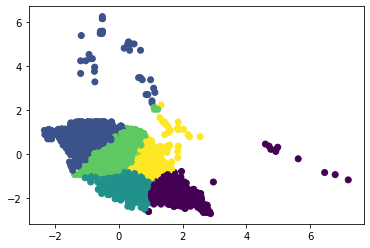

In [25]:
_pred = BRC.predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred)

In [26]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
## In the first call of partial_fit(), we must mentioned the possible classes
SGD.partial_fit(X_train.values[0].reshape(1,-1), y_train.values[0].ravel(), classes = [0,1])
counter = 0
for i in range(1, X_train.shape[0]):
    SGD.partial_fit(X_train.values[i].reshape(1,-1), y_train.values[i].ravel())
    
     
    y_hat = SGD.predict(X_train.values[i].reshape(1,-1))
    
    if y_hat[0] == 1 or y_train.values[i] == 1:    
        print("Prediction: ", y_hat)
        print("Real: ", y_train.values[i])
        counter +=1


print(SGD.score(X_test, y_test))
print(counter)

Prediction:  [0]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction:  [1]
Real:  1
Prediction: 